<a href="https://colab.research.google.com/github/joaoSilvaL/ExploratoryDataAnalysisProject/blob/main/Projeto_an%C3%A1ise_explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detalhes da base de dados:

Um conjunto de dados com preços e porcentagens de variação de preços de matérias primas agrícolas.

# Objetivo do Projeto:

Realizar uma análise exploratória dos dados com o objetivo de compreender tendências e relações no conjunto de dados, além da exploração de estatísticas descritivas e visualizações para extrair insights relevantes.

# Importando bibliotecas

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Carregando dados

In [134]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/agricultural_raw_material.csv')

**Checando dados null**

In [135]:
df.isnull().sum()

,0
Month,0
Coarse wool Price,34
Coarse wool price % Change,34
Copra Price,22
Copra price % Change,22
Cotton Price,0
Cotton price % Change,0
Fine wool Price,34
Fine wool price % Change,34
Hard log Price,0


# Tratando dados ausentes, incorretos ou inválidos

In [136]:
# Transformando todos esses dados em NaN
df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)

# Removendo dados NaN
df = df.dropna()

df.isnull().sum()

# transformando dados em float
colunas = df.columns[1:]
df[colunas] = df[colunas].astype(float)

df.dtypes

,0
Month,object
Coarse wool Price,float64
Coarse wool price % Change,float64
Copra Price,float64
Copra price % Change,float64
Cotton Price,float64
Cotton price % Change,float64
Fine wool Price,float64
Fine wool price % Change,float64
Hard log Price,float64


In [137]:
# Primeira visualiação dos dados
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,491.88,10.55,99.46,0.54,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,495.39,0.71,97.90,1.57,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,485.86,1.92,96.75,1.17,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,487.52,0.34,91.89,5.02,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,487.75,0.05,87.66,4.60,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


**Formatando a coluna datetime**, também vou seta-la como índice para o conjunto de dados

In [138]:
df.Month = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)

# Indexando a coluna "Month"
df = df.set_index('Month')

In [139]:
df.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,491.88,10.55,99.46,0.54,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,495.39,0.71,97.90,1.57,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,485.86,1.92,96.75,1.17,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,487.52,0.34,91.89,5.02,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,487.75,0.05,87.66,4.60,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


**Configurando características dos gráficos que serão gerados**

In [140]:
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# **Mapa de calor**

Ao trazer o mapa de calor, podemos ver se o preço de determinada matéria prima está correlacionada com outra.


Para todas as variáveis de preço existe uma variável "price % change", ao montar o gráfico de calor irei ignorar essas variáveis.

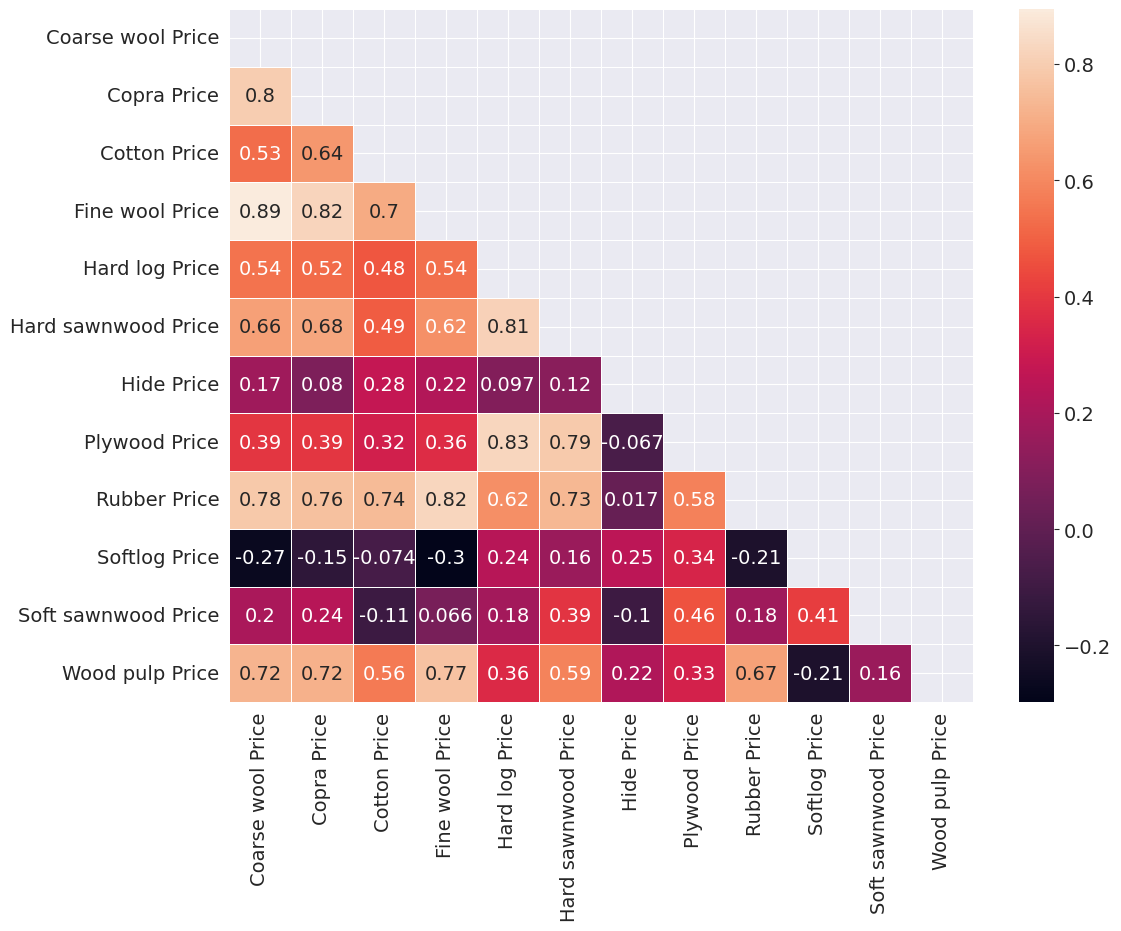

In [141]:
# Variáveis escolhidas
colunas_grafico = ['Coarse wool Price',  'Copra Price','Cotton Price', 'Fine wool Price',  'Hard log Price', 'Hard sawnwood Price',
 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']

# Calculando a matriz de correlação
correlation_matrix = df[colunas_grafico].corr()

fig = plt.figure(figsize = (12, 9))
# Retirando o triângulo superior da matriz, já que, como a matriz é simétrica os dados só estão se repetindo
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, mask=mask)
plt.show()

Mapa da correlação das variáveis "price % change"

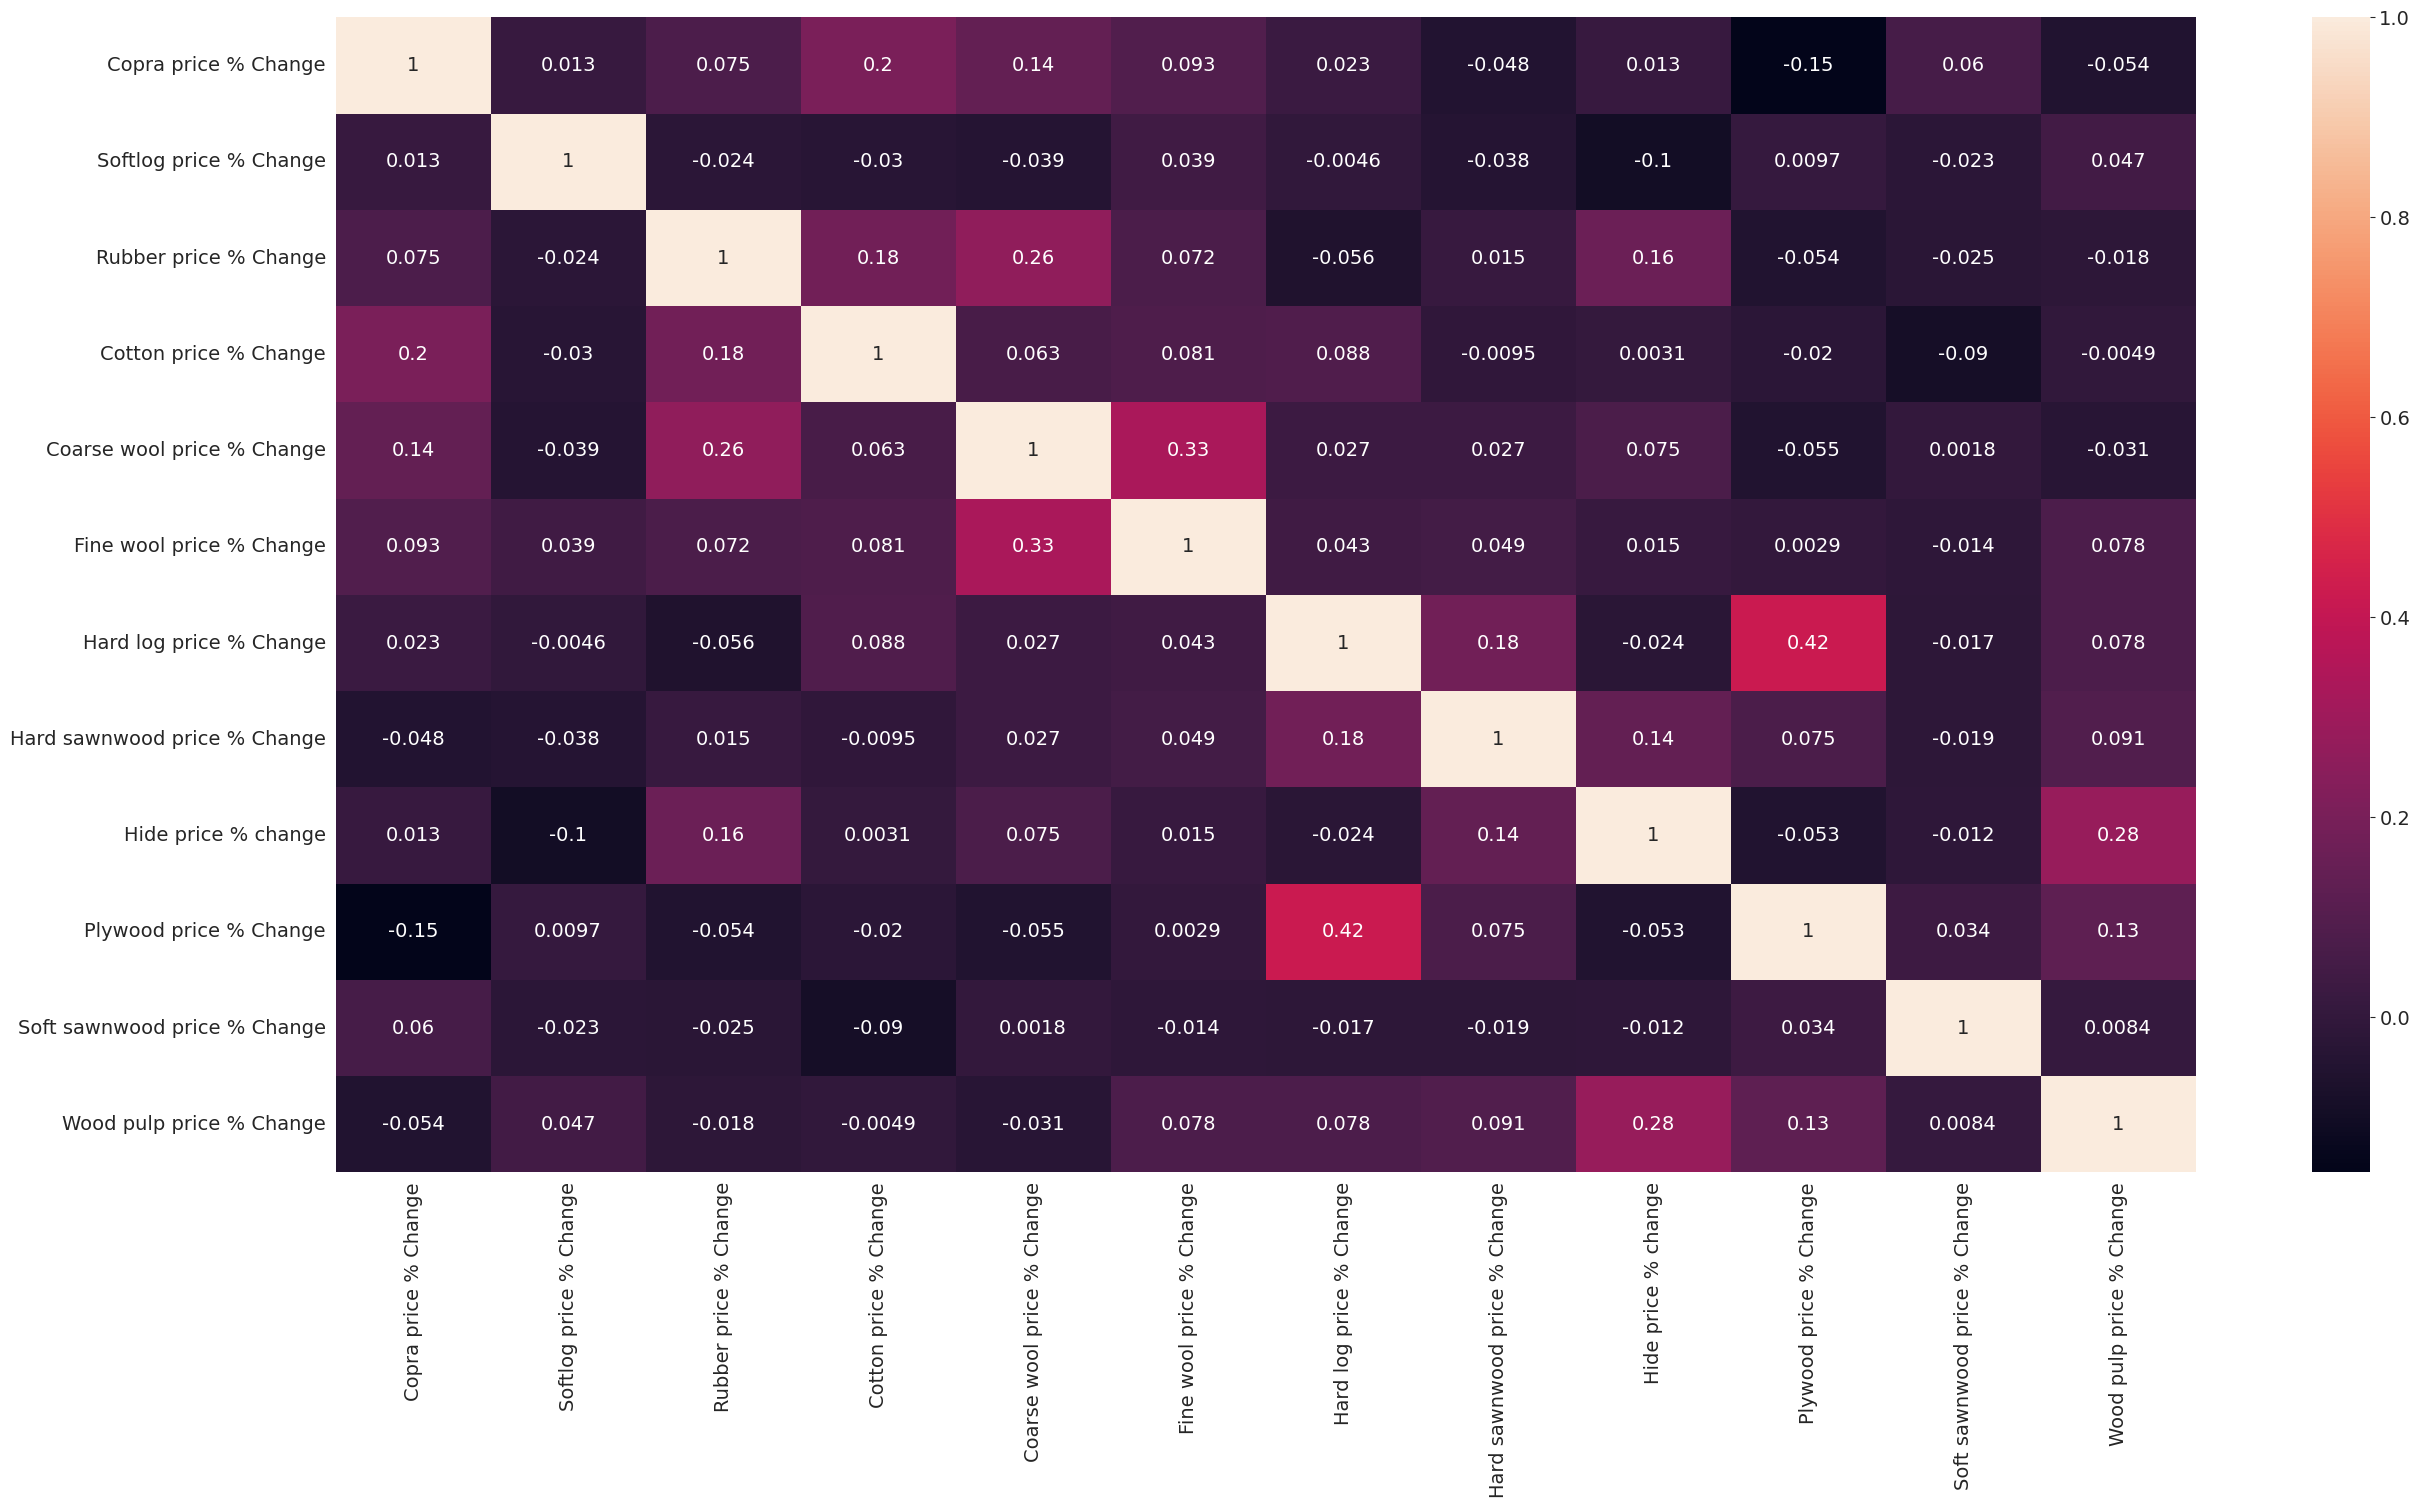

In [142]:
plt.figure(figsize=(30,15))

# Colunas escolhidas
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change',
            'Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change',
            'Soft sawnwood price % Change','Wood pulp price % Change']

# Calcuando a matriz de correlação
correlation_matrix = df[changelist].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Com base no gráfico, pode-se afirmar que a variação percentual dos preços das matérias-primas apresenta pouca ou nenhuma relação.

# Escolhendo uma variável para ver como ela se comporta

**Coarse Wool**

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

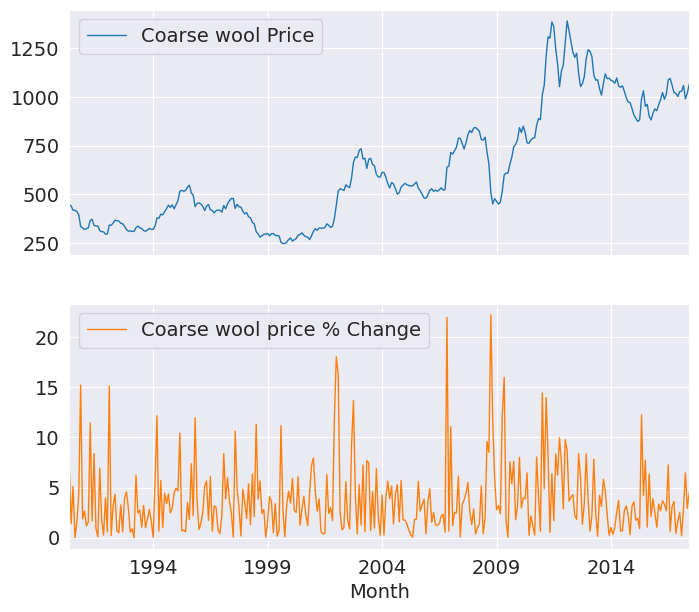

In [143]:
df[["Coarse wool Price", "Coarse wool price % Change"]].plot(figsize=(8, 7), subplots=True, linewidth=1)

Podemos utilizar o mesmo comando para analisar todas as outras matérias primas

# Respondendo perguntas relevantes

### **Q1: Qual a variação normal do preço de cada matéria-prima?**

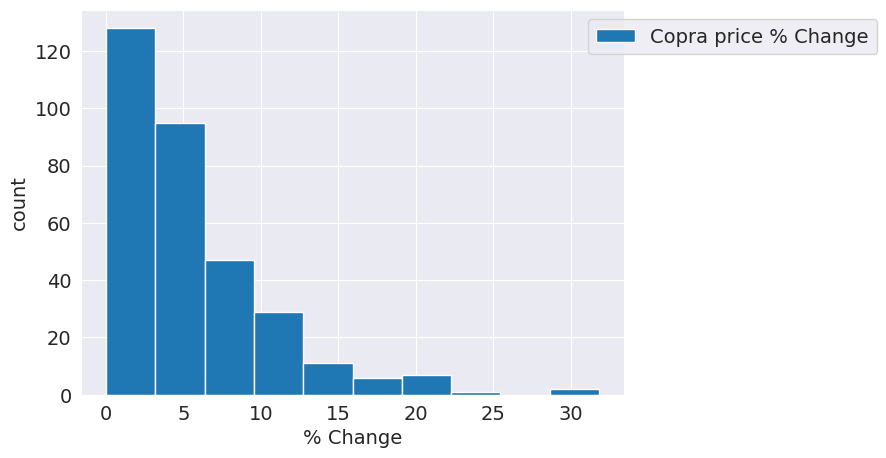

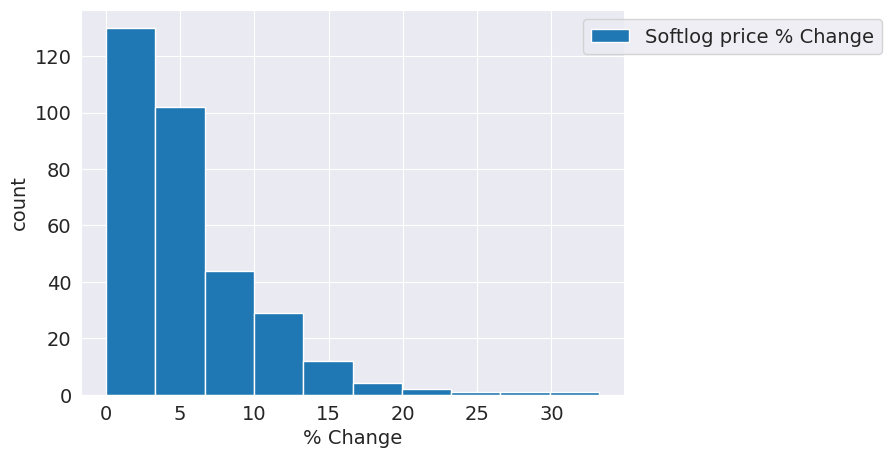

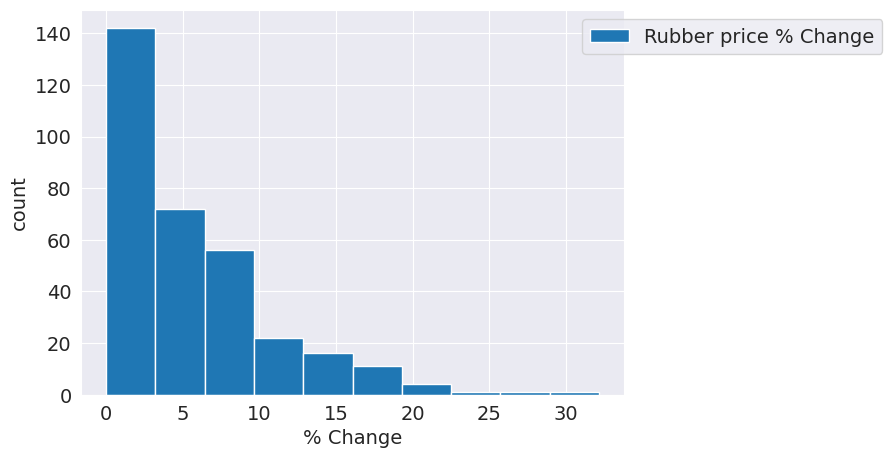

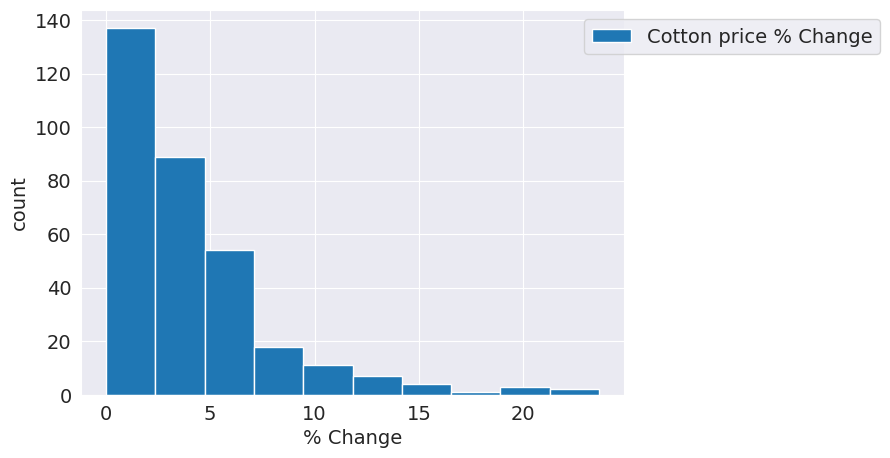

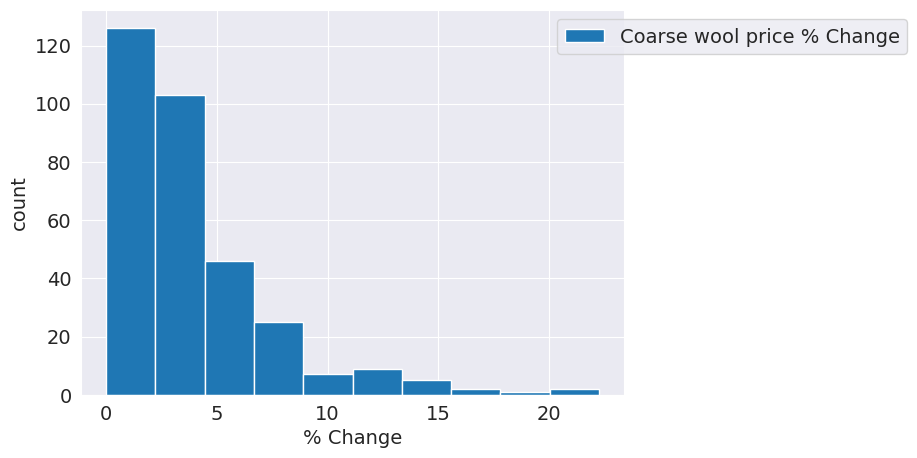

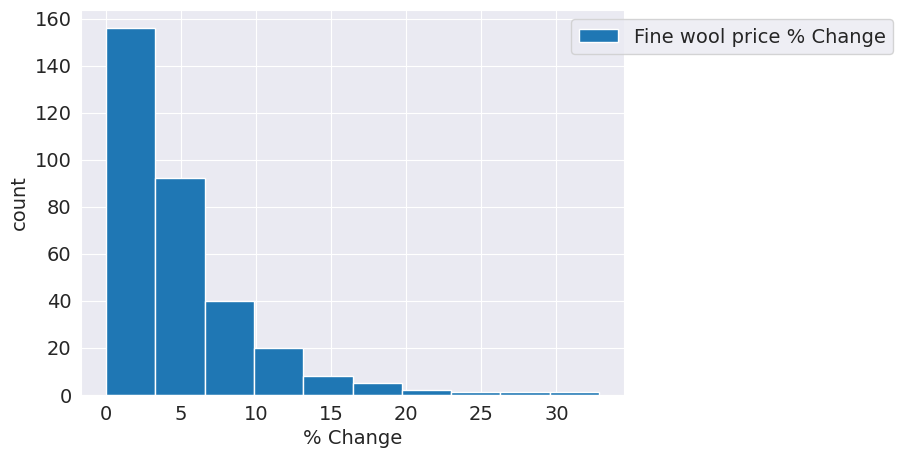

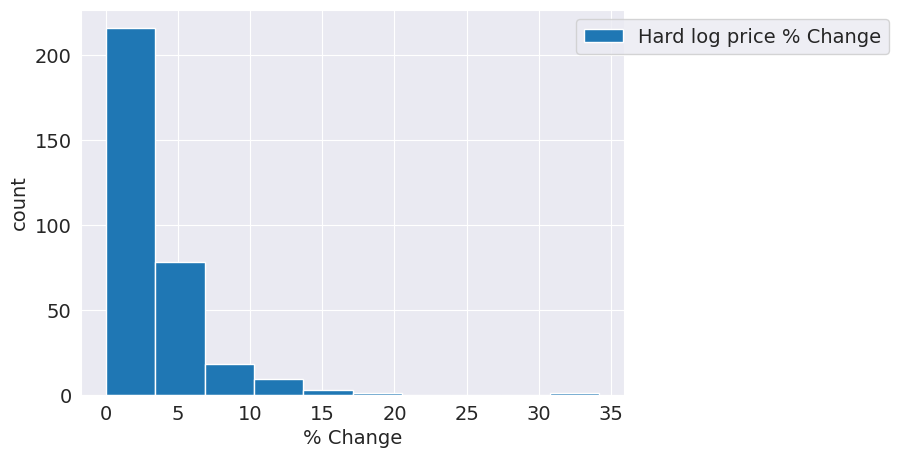

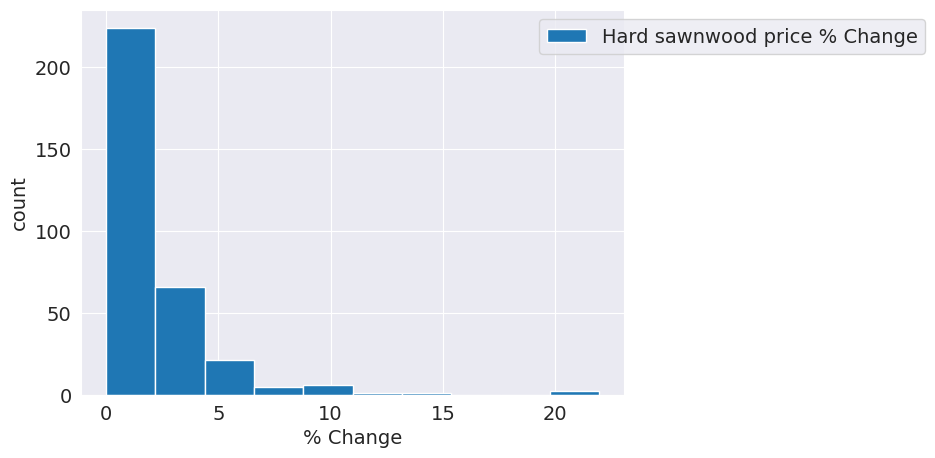

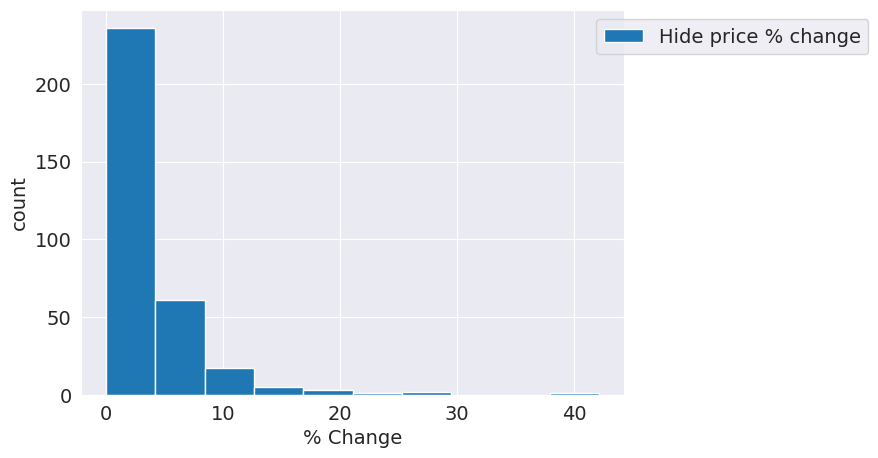

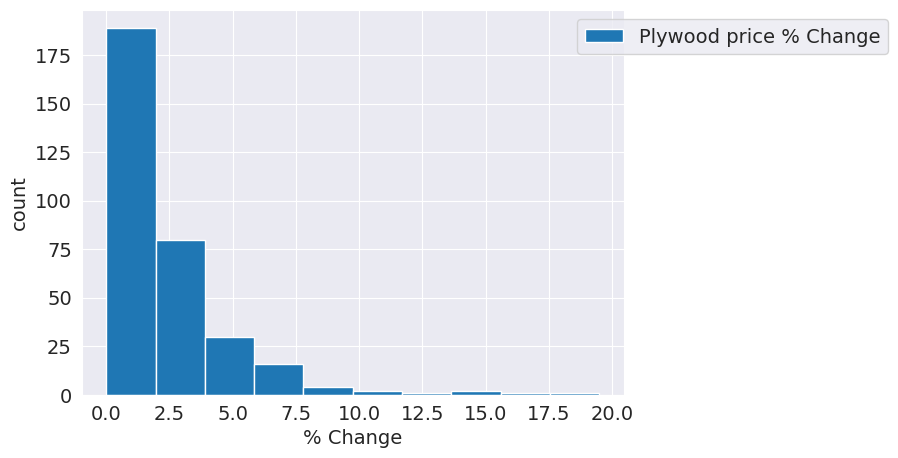

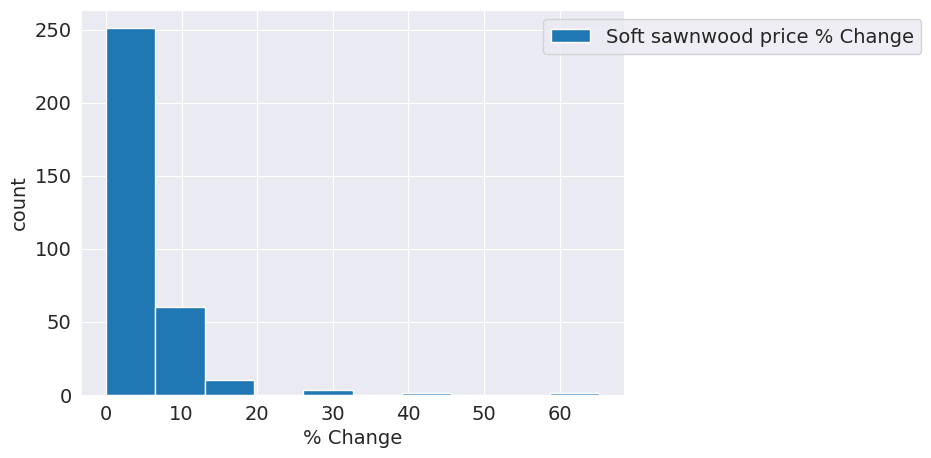

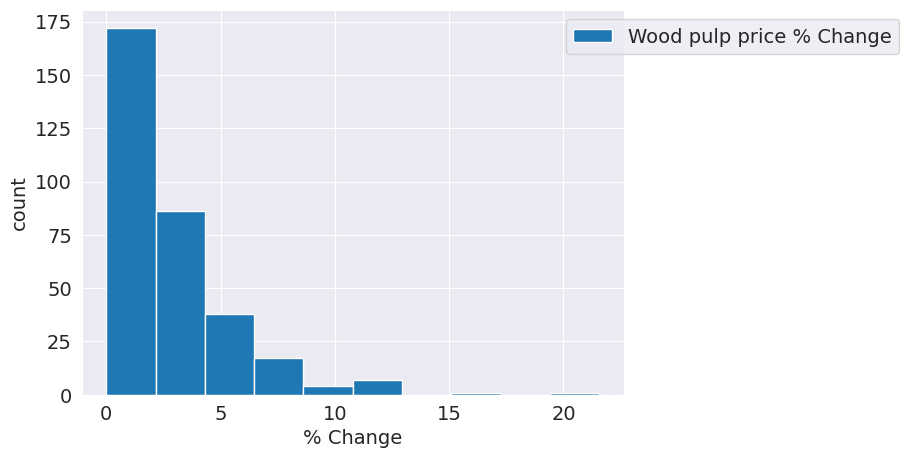

In [153]:
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change',
            'Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change',
            'Soft sawnwood price % Change','Wood pulp price % Change']

for i in range(len(changelist)):
    plt.figure(figsize=(12,12))
    df[changelist[i]].hist(figsize=(7, 5), linewidth=1)
    plt.xlabel('% Change')
    plt.ylabel('count')
    plt.legend(changelist[i:],loc='upper center',bbox_to_anchor=(1.2,1))

Podemos observar que a maioria das matérias-primas geralmente variam seu preço em menos de 5%

### **Q2: Qual a matéria-prima com o menor preço ao longo dos anos?**

Text(0.5, 0.98, 'Comparação dos preços de cada matéria-prima')

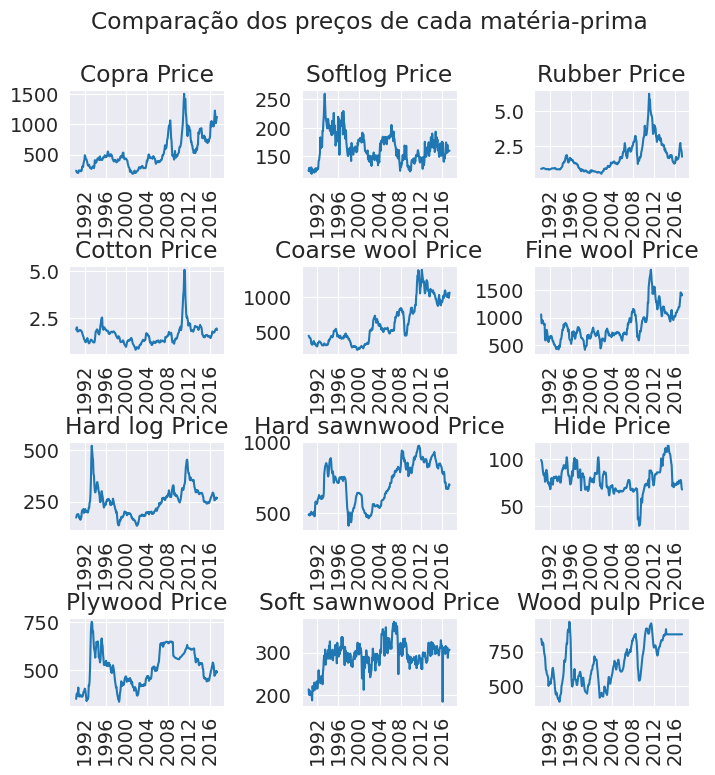

In [157]:
plt.figure(figsize=(8, 8))
colunas_grafico = ['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price',
               'Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']

for i in range(len(colunas_grafico)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.title(colunas_grafico[i])
    plt.plot(df[colunas_grafico[i]])
    plt.xticks(rotation=90)
plt.suptitle("Comparação dos preços de cada matéria-prima")

Aqui podemos observar que "Cotton"(algodão) e "Rubber"(borracha) tiveram os menores preços ao longo dos anos.

Outra observação importante é que no periodo de 2008 até 2012 foi comum uma variação brusca nos preços.

Sabendo que o algodão e a borracha tem os menores preços, podemos analisar as duas com mais detalhes para ver qual foi mais barata.

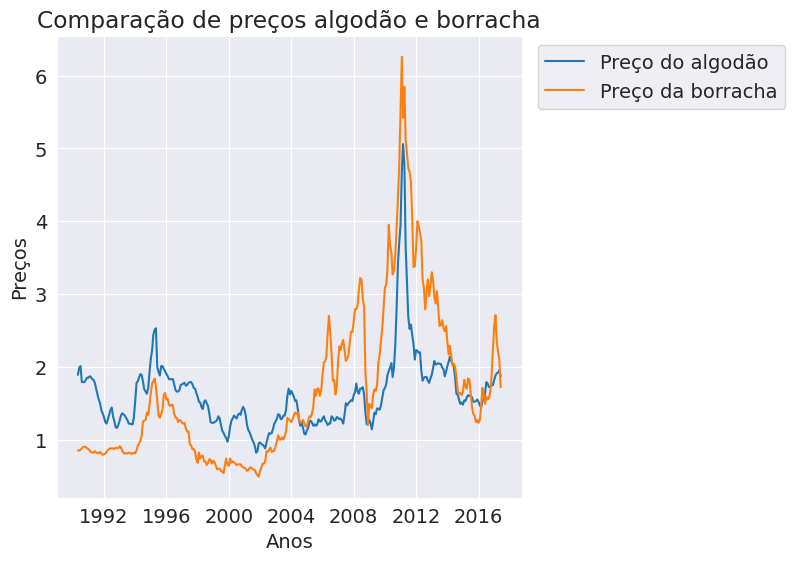

In [166]:
plt.figure(figsize=(6, 6))
plt.plot(df[['Cotton Price','Rubber Price']])
plt.title("Comparação de preços algodão e borracha")
plt.xlabel('Anos')
plt.ylabel('Preços')
plt.legend(['Preço do algodão','Preço da borracha'],loc='upper center',bbox_to_anchor=(1.3,1))

**Algodão** teve um menor preço nos últimos anos

### Q3: Qual matéria-prima teve a maior variação na % de preço?

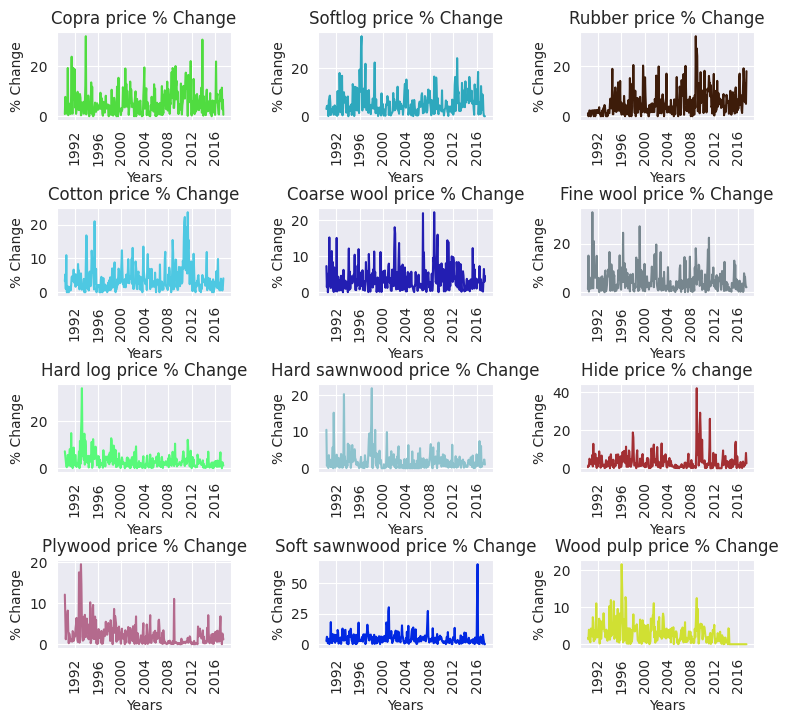

In [185]:
import random as random

plt.figure(figsize=(9,8))
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (4, 3)

for i in range(len(changelist)):

    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.plot(df[changelist[i]],c=color)
    plt.xticks(rotation=90)
    plt.title(changelist[i])
    plt.xlabel('Years')
    plt.ylabel('% Change')

Podemos ver que o maior percentual de variação no preço foi da "**Soft sawnwood**" com mais de 60%

### Q4: Quais matérias primas são de baixo preço? e quais são de alto preço?

Text(0, 0.5, 'Preço Médio')

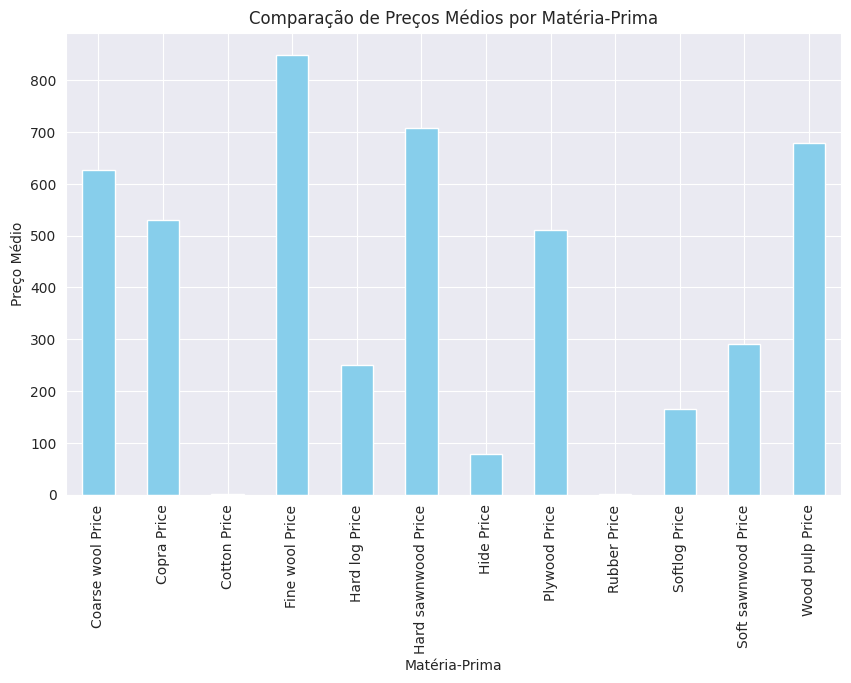

In [189]:
plt.figure(figsize=(12,12))
plt.ylabel('Preços')
plt.xlabel('Anos')

colunas_grafico = ['Coarse wool Price',  'Copra Price','Cotton Price', 'Fine wool Price',  'Hard log Price', 'Hard sawnwood Price',
 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']

precos_medios = df[colunas_grafico].mean()
precos_medios.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Comparação de Preços Médios por Matéria-Prima')
plt.xlabel('Matéria-Prima')
plt.ylabel('Preço Médio')

Colocando a metade inferior como baixo preço e a metade superior como alto preço.

**Matérias-primas de baixo preço:** Cotton, Rubber, Hide, Softlog, Hard log, Soft sawnwood.

**Marérias-primas de alto preço:** Fine wool, Hard sawnwood, Wood pulp, Coarse wool, Copra, Plywood.

# Conclusão



*   Classificamos quais materias primas são de alto custo e as de baixo custo
*   Analisamos a variabilidade dos preços ao decorrer dos anos
*   Observamos a correlação entre os preços e as taxas de variação
*   Identificamos a mais alta % de variação dos materiais

